<a href="https://colab.research.google.com/github/NoahLee99/Data-Science-studylog/blob/main/3%EC%A3%BC%EC%B0%A8_%EB%AF%B8%EC%85%98.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Q1.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns

# 한글폰트 사용을 위해 설치
# 아래 모듈을 설치하고 불러오면 별도의 한글폰트 설정이 필요 없습니다.
# colab 에서도 아래 설치 문구의 주석을 제거하고 설치하고 import 해주기만 하면 한글폰트가 잘 나옵니다.
# !pip install koreanize-matplotlib

import koreanize_matplotlib

# df = pd.read_csv("boostcourse-ds-510/data/NHIS_OPEN_GJ_2017.CSV.zip", encoding="cp949")
df = pd.read_csv("https://raw.githubusercontent.com/corazzon/boostcourse-ds-510/master/data/NHIS_OPEN_GJ_2017.CSV.zip",
                 encoding="cp949")

In [ ]:
age_code = {1: '0~4세',
 2: '5~9세',
 3: '10~14세',
 4: '15~19세',
 5: '20~24세',
 6: '25~29세',
 7: '30~34세',
 8: '35~39세',
 9: '40~44세',
 10: '45~49세',
 11: '50~54세',
 12: '55~59세',
 13: '60~64세',
 14: '65~69세',
 15: '70~74세',
 16: '75~79세',
 17: '80~84세',
 18: '85세+'}

In [ ]:
df_filtered = df[df['연령대코드(5세단위)'] >= 5] # 딕셔너리의 20~24세 값부터 범위 설정!

df_filtered['연령대'] = df_filtered['연령대코드(5세단위)'].map(age_code) # "연령대코드(5세단위)" 값을 딕셔너리 값으로 변환 후 "연령대" 컬럼 추가

filtered_group = df_filtered.groupby('연령대')['허리둘레'].describe() # "연령대" 컬럼으로 그룹화하고 허리둘레 기술통계 요약

filtered_group

,count,mean,std,min,25%,50%,75%,max
연령대,,,,,,,,
20~24세,23244.0,75.152220,12.251781,47.5,67.5,73.4,81.0,999.0
25~29세,64898.0,77.704783,16.735734,48.0,69.0,76.5,84.2,999.0
30~34세,77517.0,81.089268,22.988111,49.0,72.0,80.1,88.0,999.0
35~39세,84621.0,82.094012,14.522095,9.2,75.0,82.0,89.0,999.0
40~44세,130912.0,80.488308,10.803098,42.1,73.0,80.0,87.0,999.0
45~49세,118357.0,80.822449,9.521622,40.0,74.0,81.0,87.0,137.0
50~54세,129833.0,81.062754,9.095438,6.5,75.0,81.0,87.0,142.0
55~59세,112175.0,81.799905,8.730398,32.0,76.0,82.0,87.5,139.0
60~64세,106491.0,82.722769,8.596176,0.0,77.0,83.0,88.0,137.0


## Q2.

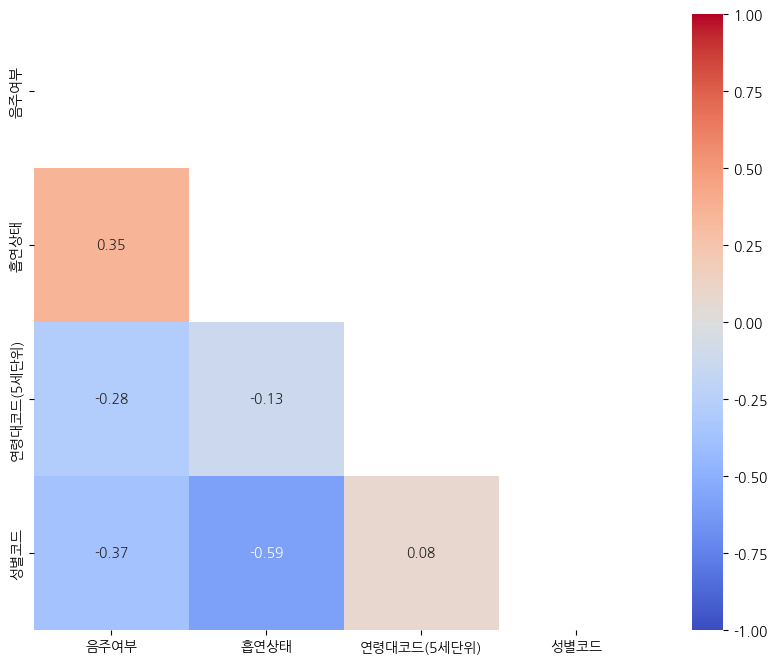

In [ ]:
import matplotlib.pyplot as plt

cols = ['음주여부', '흡연상태', '연령대코드(5세단위)', '성별코드'] # 계산에 필요한 칼럼 선정
df_selected = df[cols]

corr = df_selected.corr() # 상관계수 계산

mask = np.triu(np.ones_like(corr, dtype=bool)) # 대각선 아래의 것들만 보이게 설정

plt.figure(figsize=(10, 8)) # 히트맵으로 시각화
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1, mask=mask, cbar=True)
plt.show()


## Q3.

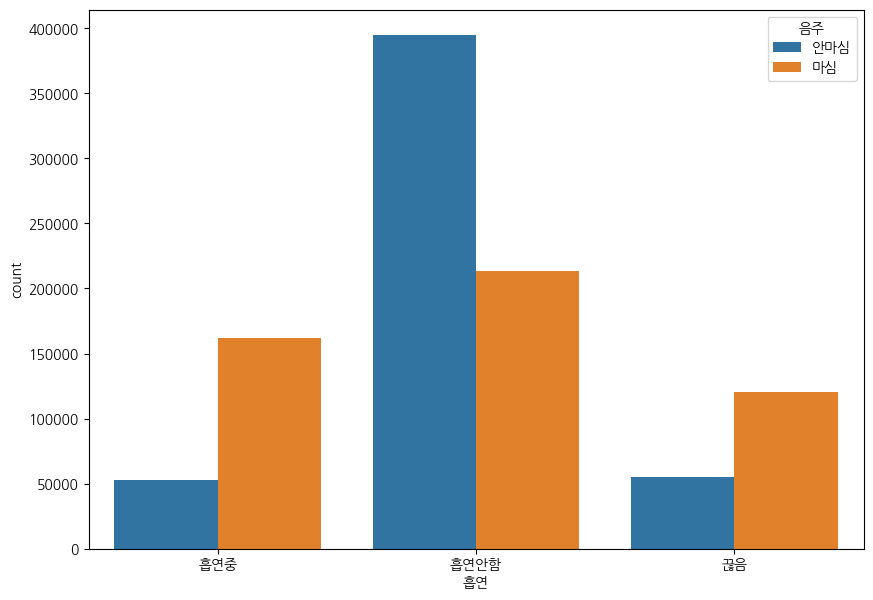

In [ ]:
# 딕셔너리 키값에 문자열 지정
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

df['흡연상태'] = df['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)

# 교차 테이블 생성 및 출력
cross_tab = pd.crosstab(df['흡연상태'], df['음주여부'])
cross_tab

# 교차 테이블 막대 그래프로 시각화!
plt.figure(figsize=(10, 7))
sns.countplot(data=df, x="흡연상태", hue="음주여부")

plt.xlabel('흡연')
plt.ylabel('count')
plt.legend(title='음주')
plt.show()

## Q4.

In [ ]:
# Index 이름을 찾기 위한 process
print(df.columns)

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')


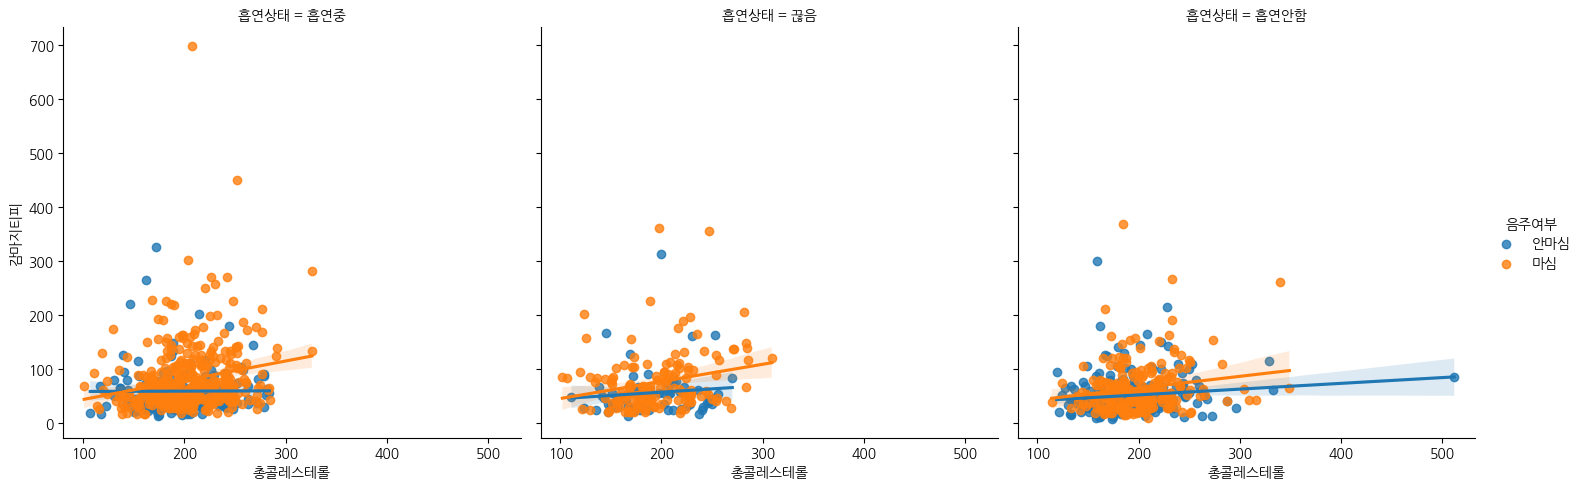

In [ ]:
smoke = {1: "흡연안함", 2: "끊음", 3: "흡연중"}
drink = {0: "안마심", 1: "마심"}

# 딕셔너리를 사용해 숫자를 문자 형태로 변환
df['흡연상태'] = df['흡연상태'].replace(smoke)
df['음주여부'] = df['음주여부'].replace(drink)

# 120kg 이상인 데이터 필터링
over = df[df["체중(5Kg 단위)"] >= 120]

# 산점도 시각화
sns.lmplot(data=over, x="총콜레스테롤", y="감마지티피", hue="음주여부", col="흡연상태")
plt.show()

## Q5.

In [ ]:
# Index 이름을 찾기 위한 process
print(df.columns)

Index(['기준년도', '가입자일련번호', '성별코드', '연령대코드(5세단위)', '시도코드', '신장(5Cm단위)',
       '체중(5Kg 단위)', '허리둘레', '시력(좌)', '시력(우)', '청력(좌)', '청력(우)', '수축기혈압',
       '이완기혈압', '식전혈당(공복혈당)', '총콜레스테롤', '트리글리세라이드', 'HDL콜레스테롤', 'LDL콜레스테롤',
       '혈색소', '요단백', '혈청크레아티닌', '(혈청지오티)AST', '(혈청지오티)ALT', '감마지티피', '흡연상태',
       '음주여부', '구강검진 수검여부', '치아우식증유무', '결손치유무', '치아마모증유무', '제3대구치(사랑니)이상',
       '치석', '데이터공개일자'],
      dtype='object')


C:\Users\JunQuixote\AppData\Local\Temp\ipykernel_26568\2577399155.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['연령대'] = df_filtered['연령대코드(5세단위)'].map(age_code)


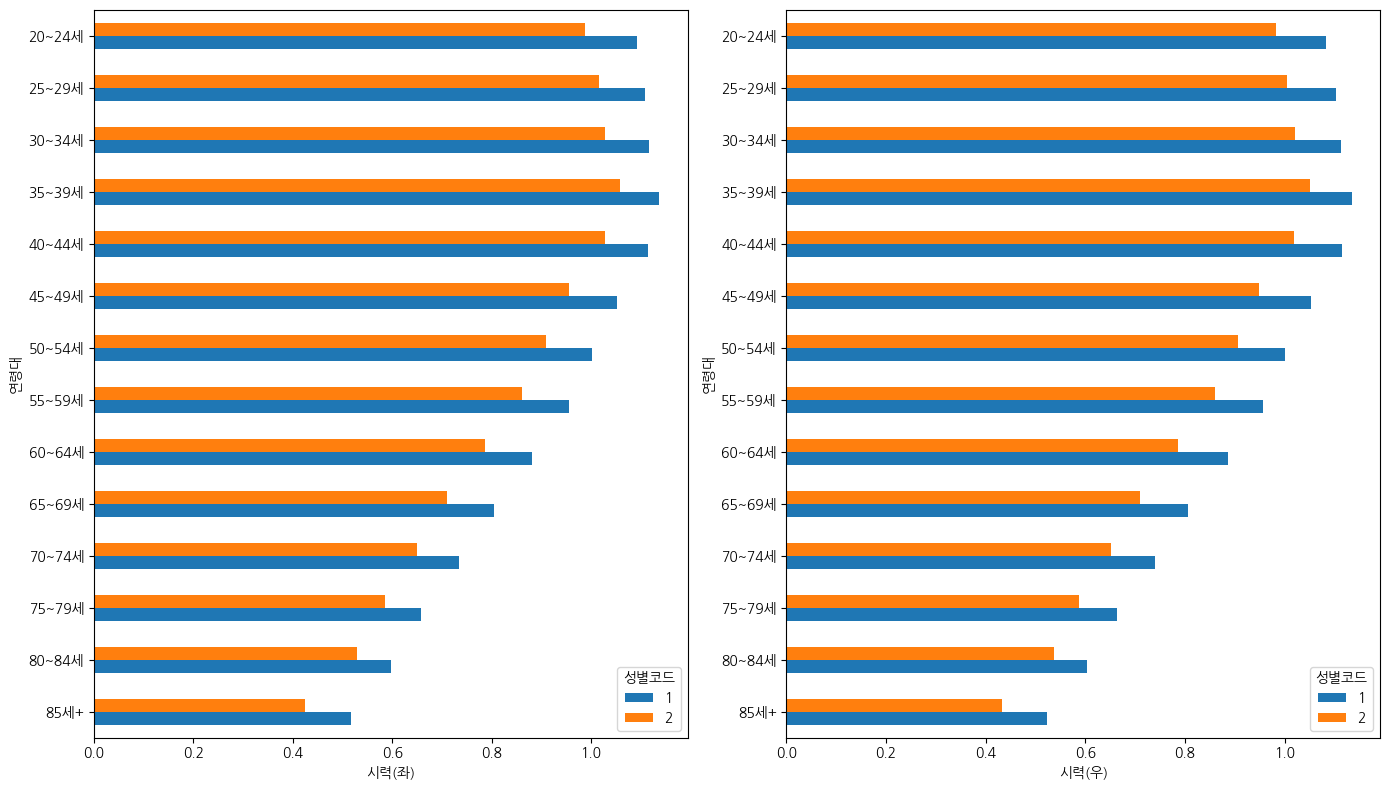

In [ ]:
# 실명 데이터 제외 필터링
df_filtered = df[(df['시력(좌)'] < 9.9) & (df['시력(우)'] < 9.9) &
                 (df['시력(좌)'] > 0) & (df['시력(우)'] > 0)]

# 연령대 코드 딕셔너리
age_code = {1: '0~4세', 2: '5~9세', 3: '10~14세', 4: '15~19세', 5: '20~24세',
            6: '25~29세', 7: '30~34세', 8: '35~39세', 9: '40~44세', 10: '45~49세',
            11: '50~54세', 12: '55~59세', 13: '60~64세', 14: '65~69세',
            15: '70~74세', 16: '75~79세', 17: '80~84세', 18: '85세+'}

# 연령대 코드 딕셔너리 컬럼에 적용
df_filtered['연령대'] = df_filtered['연령대코드(5세단위)'].map(age_code)

# 연령대, 성별에 따른 평균 좌우 시력 계산
mean_sight = df_filtered.groupby(['연령대', '성별코드'])[['시력(좌)', '시력(우)']].mean().unstack().sort_index(ascending=False)

# subplots을 사용한 막대그래프 시각화
fig, axes = plt.subplots(1, 2, figsize=(14, 8))

#좌안
mean_sight['시력(좌)'].plot(kind='barh', ax=axes[0], color=['#1f77b4', '#ff7f0e'], legend=True)
axes[0].set_xlabel('시력(좌)')
axes[0].set_ylabel('연령대')

#우안
mean_sight['시력(우)'].plot(kind='barh', ax=axes[1], color=['#1f77b4', '#ff7f0e'], legend=True)
axes[1].set_xlabel('시력(우)')
axes[1].set_ylabel('연령대')

plt.tight_layout()
plt.show()
